<a href="https://colab.research.google.com/github/aragornchunletia/llms/blob/main/karpathy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import unicodedata

In [ ]:
names = pd.read_csv(r'/content/drive/MyDrive/final_names.txt' ,sep = '\t', header = None )[1].tolist()
names

['kishore kashyap',
 'naresh sharma',
 'kasave chand varama jaan nisar akhtar',
 'era natarasan',
 'manisha kulshreshtha',
 'ashok vajpeyi',
 'teji grover',
 's verma',
 'samyuktha ludhara',
 'bāṇabhaṭṭa',
 'anonymous',
 'dinesh prasad singh',
 'sahir ludhianvi',
 'sanjib chandra chattopadhyay',
 'kannadasan',
 'vineet gill',
 'rahi masoom raza',
 'paptu dhurve',
 'anuradha',
 'amish tripathi',
 'kālidāsa',
 'vinod kumar shukla',
 'niranjan tiwari',
 'amritlal nagar',
 'aachrya sharma',
 'bob burg',
 'kalki krishnamurthy',
 'william shakespeare',
 'asghar wajahat',
 'ajit wadnerkar',
 'ashish chaudhary',
 'satyajit rai',
 'oswal publishers',
 'jeyamohan',
 'devdutt pattanaik',
 'shri jayadayal goyandka',
 'shantanu gupta',
 'kartar singh duggal',
 'sarat chandra chattopadhyay',
 'mary lutyens',
 'अवनीश सिंह चौहान',
 'अजिंक्य शर्मा',
 'स्वामी सहजानन्द सरस्वती',
 'purabi roy',
 'anil yadav',
 'anita desai',
 'chandra soumya',
 'swami govindanand sarswati',
 'कुलदीप राघव',
 'mohan rakesh'

In [ ]:
names

['kishore kashyap',
 'naresh sharma',
 'kasave chand varama jaan nisar akhtar',
 'era natarasan',
 'manisha kulshreshtha',
 'ashok vajpeyi',
 'teji grover',
 's verma',
 'samyuktha ludhara',
 'bāṇabhaṭṭa',
 'anonymous',
 'dinesh prasad singh',
 'sahir ludhianvi',
 'sanjib chandra chattopadhyay',
 'kannadasan',
 'vineet gill',
 'rahi masoom raza',
 'paptu dhurve',
 'anuradha',
 'amish tripathi',
 'kālidāsa',
 'vinod kumar shukla',
 'niranjan tiwari',
 'amritlal nagar',
 'aachrya sharma',
 'bob burg',
 'kalki krishnamurthy',
 'william shakespeare',
 'asghar wajahat',
 'ajit wadnerkar',
 'ashish chaudhary',
 'satyajit rai',
 'oswal publishers',
 'jeyamohan',
 'devdutt pattanaik',
 'shri jayadayal goyandka',
 'shantanu gupta',
 'kartar singh duggal',
 'sarat chandra chattopadhyay',
 'mary lutyens',
 'अवनीश सिंह चौहान',
 'अजिंक्य शर्मा',
 'स्वामी सहजानन्द सरस्वती',
 'purabi roy',
 'anil yadav',
 'anita desai',
 'chandra soumya',
 'swami govindanand sarswati',
 'कुलदीप राघव',
 'mohan rakesh'

In [ ]:
chars = sorted(list(set(''.join(names))))

In [ ]:
print(chars , len(chars))

['\t', ' ', "'", '(', ')', '-', '.', '1', '2', '3', '6', '7', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', 'é', 'ā', 'č', 'ś', 'ū', 'ا', 'ت', 'ح', 'د', 'س', 'ع', 'م', 'ن', 'و', 'ٹ', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'ळ', 'व', 'श', 'ष', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ॉ', 'ो', 'ौ', '्', 'ज़', '०', 'ṇ', 'ṭ', '\u200b', '\u200c'] 118


In [ ]:
def remove_special_chars(input_string):
    chars_to_remove = "()-.123'67\t"
    cleaned_string = ''.join(char for char in input_string if char not in chars_to_remove)
    cleaned_string = unicodedata.normalize('NFKD', cleaned_string)

    return cleaned_string

In [ ]:
names = [remove_special_chars(name) for name in names]
chars = sorted(list(set(''.join(names))))
print(chars , len(chars))

[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '́', '̄', '̌', '̣', 'ا', 'ت', 'ح', 'د', 'س', 'ع', 'م', 'ن', 'و', 'ٹ', 'ँ', 'ं', 'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ओ', 'औ', 'क', 'ख', 'ग', 'घ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'ळ', 'व', 'श', 'ष', 'स', 'ह', '़', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ॉ', 'ो', 'ौ', '्', '०', '\u200b', '\u200c'] 102


In [ ]:
char_dict = {}
char_dict['.'] = 0
reverse_dict = {}
reverse_dict[0] = '.'
for i,char in enumerate(chars, 1):
  char_dict[char] = i
  reverse_dict[i] = char

print(char_dict)
print(reverse_dict)

{'.': 0, ' ': 1, 'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '́': 28, '̄': 29, '̌': 30, '̣': 31, 'ا': 32, 'ت': 33, 'ح': 34, 'د': 35, 'س': 36, 'ع': 37, 'م': 38, 'ن': 39, 'و': 40, 'ٹ': 41, 'ँ': 42, 'ं': 43, 'अ': 44, 'आ': 45, 'इ': 46, 'ई': 47, 'उ': 48, 'ऊ': 49, 'ऋ': 50, 'ए': 51, 'ओ': 52, 'औ': 53, 'क': 54, 'ख': 55, 'ग': 56, 'घ': 57, 'च': 58, 'छ': 59, 'ज': 60, 'झ': 61, 'ञ': 62, 'ट': 63, 'ठ': 64, 'ड': 65, 'ढ': 66, 'ण': 67, 'त': 68, 'थ': 69, 'द': 70, 'ध': 71, 'न': 72, 'प': 73, 'फ': 74, 'ब': 75, 'भ': 76, 'म': 77, 'य': 78, 'र': 79, 'ल': 80, 'ळ': 81, 'व': 82, 'श': 83, 'ष': 84, 'स': 85, 'ह': 86, '़': 87, 'ा': 88, 'ि': 89, 'ी': 90, 'ु': 91, 'ू': 92, 'ृ': 93, 'े': 94, 'ै': 95, 'ॉ': 96, 'ो': 97, 'ौ': 98, '्': 99, '०': 100, '\u200b': 101, '\u200c': 102}
{0: '.', 1: ' ', 2: 'a', 3: 'b', 4: 'c', 5: 'd', 6: 'e', 7: 'f', 8: '

In [ ]:
names

['kishore kashyap',
 'naresh sharma',
 'kasave chand varama jaan nisar akhtar',
 'era natarasan',
 'manisha kulshreshtha',
 'ashok vajpeyi',
 'teji grover',
 's verma',
 'samyuktha ludhara',
 'bāṇabhaṭṭa',
 'anonymous',
 'dinesh prasad singh',
 'sahir ludhianvi',
 'sanjib chandra chattopadhyay',
 'kannadasan',
 'vineet gill',
 'rahi masoom raza',
 'paptu dhurve',
 'anuradha',
 'amish tripathi',
 'kālidāsa',
 'vinod kumar shukla',
 'niranjan tiwari',
 'amritlal nagar',
 'aachrya sharma',
 'bob burg',
 'kalki krishnamurthy',
 'william shakespeare',
 'asghar wajahat',
 'ajit wadnerkar',
 'ashish chaudhary',
 'satyajit rai',
 'oswal publishers',
 'jeyamohan',
 'devdutt pattanaik',
 'shri jayadayal goyandka',
 'shantanu gupta',
 'kartar singh duggal',
 'sarat chandra chattopadhyay',
 'mary lutyens',
 'अवनीश सिंह चौहान',
 'अजिंक्य शर्मा',
 'स्वामी सहजानन्द सरस्वती',
 'purabi roy',
 'anil yadav',
 'anita desai',
 'chandra soumya',
 'swami govindanand sarswati',
 'कुलदीप राघव',
 'mohan r

In [ ]:
import random
random.seed(42)
random.shuffle(names)

In [ ]:
X = []
Y = []
block_size = 3
for name in names:
  context = [0] * block_size
  for ch in name+'.':
    ix = char_dict[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)


In [ ]:
itr = int(len(X)*0.8)
idev = int(len(X)*0.9)

In [ ]:
X_t , Y_t = X[:itr] , Y[:itr]
X_dev , Y_dev = X[itr:idev] , Y[itr:idev]
X_test , Y_test = X[idev:] , Y[idev:]

In [ ]:
print(f' X_training -- {X_t.shape[0]}    X_dev -- {X_dev.shape[0]}   X_test --- {X_test.shape[0]}')

 X_training -- 19578    X_dev -- 2447   X_test --- 2448


In [ ]:
vocab_size = len(char_dict)
vocab_size

103

In [ ]:
#mlp creation
n_embed = 10
n_hidden = 200

g = torch.Generator().manual_seed(3141577)
C = torch.randn((vocab_size , n_embed) , generator = g)
W1 = torch.randn((n_embed * block_size , n_hidden) , generator = g)* (5/3)/((n_embed * block_size)**0.5)
#B1 = torch.randn(n_hidden , generator = g) no need as we are adding a normalizing layer
W2 = torch.randn((n_hidden , vocab_size), generator = g)* 0.01
B2 = torch.randn(vocab_size ,  generator = g)
#---normalize params-----
bngain = torch.ones((1 , n_hidden))
bnbias = torch.zeros((1, n_hidden))
bnmean_running = torch.zeros((1,n_hidden))
bnstd_running = torch.zeros((1,n_hidden))


parameters = [C,W1,W2,B2,bngain,bnbias ]
print(sum(p.nelement() for p in parameters))
for p in parameters:
  p.requires_grad = True

28133


In [ ]:
max_steps = 200000
batch_size = 8
lossi = []
for i in range(max_steps):

  # creating batches
  ix = torch.randint(0 , X_t.shape[0],(batch_size,) , generator = g)
  Xb, Yb = X_t[ix] , Y_t[ix]

  # forward pass
  emb = C[Xb]
  embcat = emb.view(emb.shape[0] , -1)
  #linear layer
  hpreact = embcat @ W1 #+ B1 this removed as we use normalization these biases will be rendered out
  #batch normalization
  bnmeani = hpreact.mean(0 , keepdim = True)
  bnstdi = hpreact.std(0, keepdim = True)
  hpreact = bngain * (hpreact - bnmeani) / bnstdi + bnbias
  with torch.no_grad():
    bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
    bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi
  # non-linear layer
  h = torch.tanh(hpreact)
  logits = h @ W2 + B2
  loss = F.cross_entropy(logits , Yb)

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track Status
  if i%10000 == 0:
    print(f'{i:7d}/{max_steps:7d} : {loss.item():.4f}')
  lossi.append(loss.log10().item())



      0/ 200000 : 4.8967
  10000/ 200000 : 3.2349
  20000/ 200000 : 2.9235
  30000/ 200000 : 2.6564
  40000/ 200000 : 2.2838
  50000/ 200000 : 2.7480
  60000/ 200000 : 1.7978
  70000/ 200000 : 2.4227
  80000/ 200000 : 2.7216
  90000/ 200000 : 2.3896
 100000/ 200000 : 2.5013
 110000/ 200000 : 1.2458
 120000/ 200000 : 2.4323
 130000/ 200000 : 3.6691
 140000/ 200000 : 2.2460
 150000/ 200000 : 2.3243
 160000/ 200000 : 2.0687
 170000/ 200000 : 1.4759
 180000/ 200000 : 2.3010
 190000/ 200000 : 2.1715


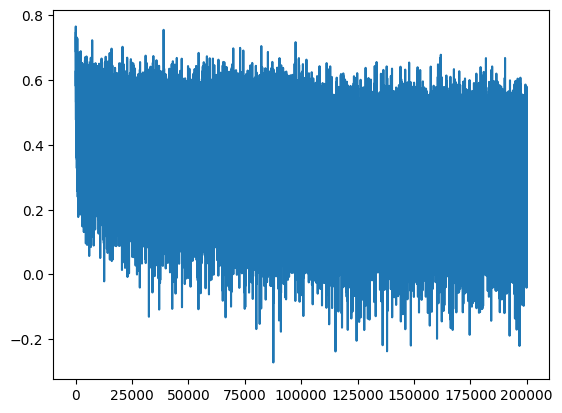

In [ ]:
plt.plot(lossi)

In [ ]:
@torch.no_grad()
def split_loss(split):
  x , y = {
      'train' : (X_t , Y_t),
      'val' : (X_dev , Y_dev),
      'test' : (X_test , Y_test)
  }[split]
  emb = C[x]
  embcat = emb.view(emb.shape[0] , -1)
  hpreact = embcat @ W1
  hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
  h = torch.tanh(hpreact)
  logits = h @ W2 + B2
  loss = F.cross_entropy(logits , y)
  print(split , loss.item())

split_loss('train')
split_loss('val')

train 1.882527232170105
val 2.332883834838867


pytorchyfying code

In [ ]:
class Linear:

  def __init__(self, fan_in , fan_out , bias = True):
    self.weight = torch.randn((fan_in , fan_out) , generator = g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self , X):
    self.out = X @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    params = [self.weight] + ([] if self.bias is None else[self.bias])
    return params


class BatchNorm1d:

  def __init__(self , dim , eps = 1e-5 , momentum = 0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # params (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self , x):
    if self.training:
      xmean = x.mean(0 , keepdim = True)
      xvar = x.var(0 , keepdim = True)
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
    self.out = self.gamma * xhat + self.beta
    if self.training:
      self.running_mean = ( 1 - self.momentum) * self.running_mean + self.momentum * xmean
      self.running_var = ( 1 - self.momentum ) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma , self.beta]

class Tanh:

  def __call__(self , x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []


n_embed = 10
n_hidden = 100
g = torch.Generator().manual_seed(314678)


C = torch.randn((vocab_size , n_embed) , generator = g )
layers = [
    Linear(n_embed*block_size , n_hidden , bias = False), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden , n_hidden , bias = False), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden , n_hidden , bias = False), BatchNorm1d(n_hidden), Tanh(),
    Linear(          n_hidden , vocab_size ,bias = False),BatchNorm1d(vocab_size),
]

with torch.no_grad():
  layers[-1].gamma *= 0.1
  for layer in layers[:-1]:
    if isinstance(layer , Linear):
      layer.weight *= 1.0

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
  p.requires_grad = True



35136


In [ ]:
max_steps = 200000
batch_size = 16
lossi = []
ud = []

for i in range(max_steps):

  #mini batch
  ix = torch.randint(0 , X_t.shape[0] , (batch_size ,) , generator = g)
  Xb,Yb = X_t[ix] ,Y_t[ix]

  emb = C[Xb]
  x = emb.view(emb.shape[0] , -1)
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x , Yb)

  for layer in layers:
    layer.out.retain_grad()
  for p in parameters:
    p.grad = None
  loss.backward()

  lr = 0.1 if i < 150000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  if i % 10000 == 0:
    print(f'{i : 7d} / {max_steps:7d} : {loss.item():.4f}')
    lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])


      0 /  200000 : 4.6495
  10000 /  200000 : 2.9488
  20000 /  200000 : 2.1811
  30000 /  200000 : 2.3839
  40000 /  200000 : 2.1049
  50000 /  200000 : 1.9971
  60000 /  200000 : 2.4754
  70000 /  200000 : 1.9314
  80000 /  200000 : 2.0057
  90000 /  200000 : 2.2142
 100000 /  200000 : 1.3754
 110000 /  200000 : 2.2870
 120000 /  200000 : 1.5877
 130000 /  200000 : 2.1015
 140000 /  200000 : 1.8071
 150000 /  200000 : 1.9412
 160000 /  200000 : 1.5610


KeyboardInterrupt: 

visualizing neural net diagnostics


 layer -- 2_Tanh : mean -- -0.0038: std_dev -- 0.7703: saturation -- 24.25%
 layer -- 5_Tanh : mean -- 0.0001: std_dev -- 0.8045: saturation -- 29.875001907348633%
 layer -- 8_Tanh : mean -- 0.0158: std_dev -- 0.8181: saturation -- 30.812498092651367%


Text(0.5, 1.0, 'activation distribution')

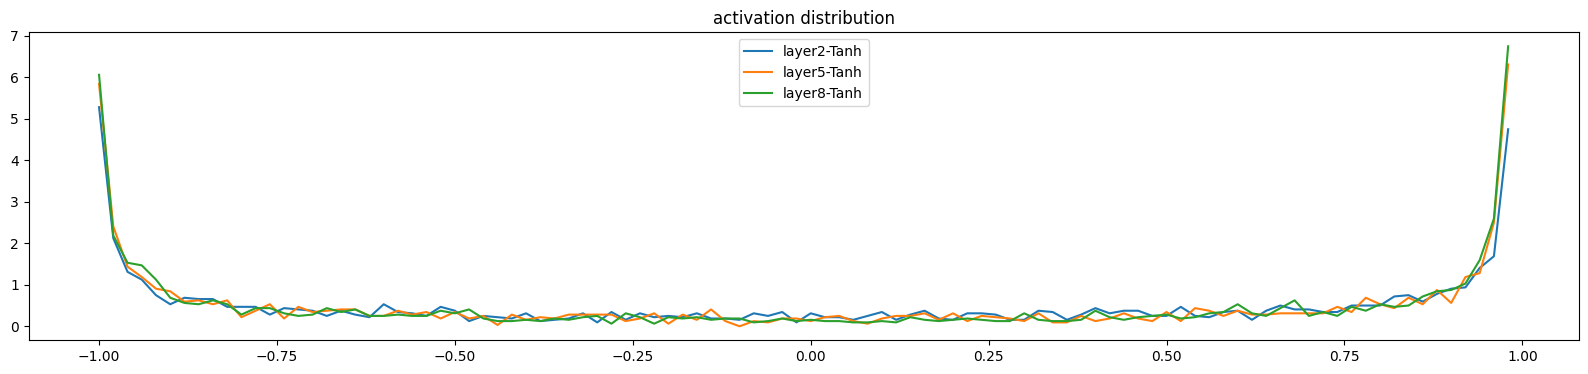

In [ ]:
plt.figure(figsize=(20,4))
legends = []
for i , layer in enumerate(layers[:-1]):
  if isinstance(layer , Tanh):
    t = layer.out
    print(f' layer -- {i}_{layer.__class__.__name__} : mean -- {t.mean():.4f}: std_dev -- {t.std():.4f}: saturation -- {(t.abs() > 0.97).float().mean()*100}%')
    hy , hx = torch.histogram(t , density = True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer{i}-{layer.__class__.__name__}')
plt.legend(legends)
plt.title('activation distribution')


layer 2 (      Tanh): mean -0.000000, std 1.531437e-02
layer 5 (      Tanh): mean +0.000000, std 1.519294e-02
layer 8 (      Tanh): mean +0.000000, std 1.339331e-02


Text(0.5, 1.0, 'gradient distribution')

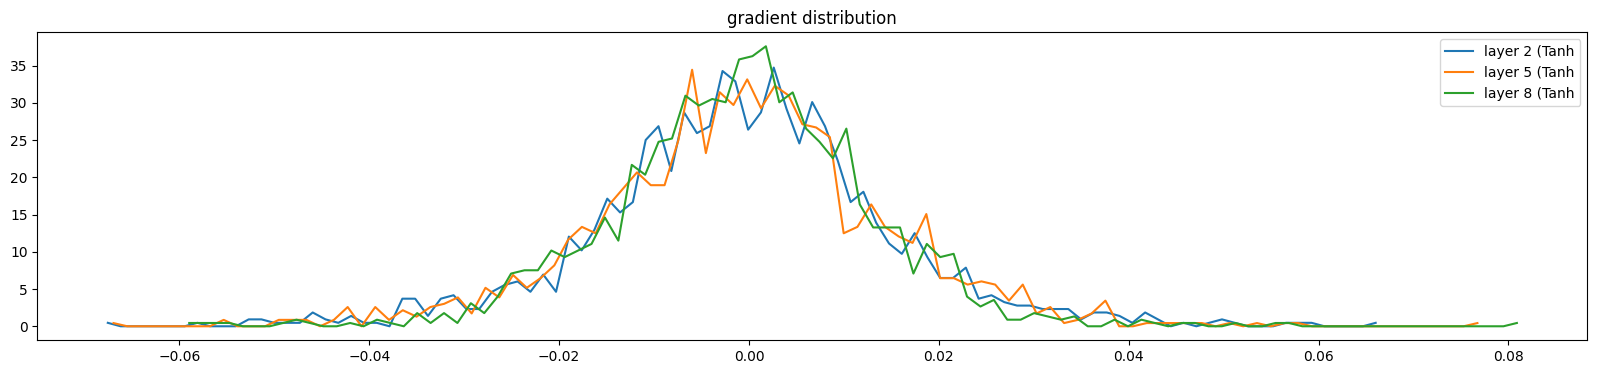

In [ ]:
plt.figure(figsize=(20, 4)) # width and height of the plot
legends = []
for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
  if isinstance(layer, Tanh):
    t = layer.out.grad
    print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i} ({layer.__class__.__name__}')
plt.legend(legends);
plt.title('gradient distribution')

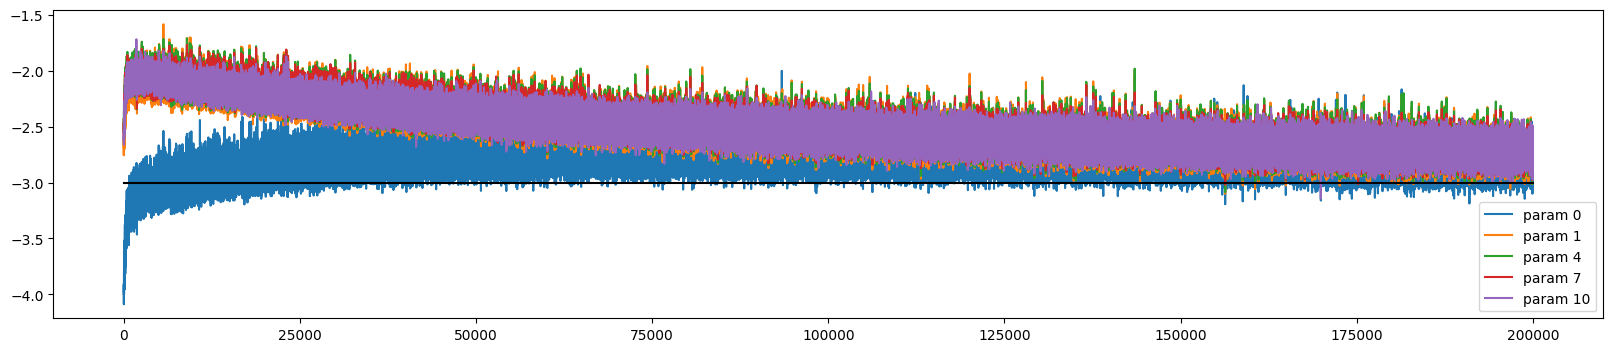

In [ ]:
plt.figure(figsize=(20, 4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
plt.legend(legends);

copied from karpathy


In [ ]:
class Linear:

  def __init__(self, fan_in, fan_out, bias=True):
    self.weight = torch.randn((fan_in, fan_out), generator=g) / fan_in**0.5
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self, x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])


class BatchNorm1d:

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True
    # parameters (trained with backprop)
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)
    # buffers (trained with a running 'momentum update')
    self.running_mean = torch.zeros(dim)
    self.running_var = torch.ones(dim)

  def __call__(self, x):
    # calculate the forward pass
    if self.training:
      xmean = x.mean(0, keepdim=True) # batch mean
      xvar = x.var(0, keepdim=True) # batch variance
    else:
      xmean = self.running_mean
      xvar = self.running_var
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    # update the buffers
    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
        self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out
  def parameters(self):
    return []

n_embd = 10 # the dimensionality of the character embedding vectors
n_hidden = 100 # the number of neurons in the hidden layer of the MLP
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((vocab_size, n_embd),            generator=g)
layers = [
  Linear(n_embd * block_size, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, n_hidden, bias=False), BatchNorm1d(n_hidden), Tanh(),
  Linear(           n_hidden, vocab_size, bias=False), BatchNorm1d(vocab_size),
]
# layers = [
#   Linear(n_embd * block_size, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, n_hidden), Tanh(),
#   Linear(           n_hidden, vocab_size),
# ]

with torch.no_grad():
  # last layer: make less confident
  layers[-1].gamma *= 0.1
  #layers[-1].weight *= 0.1
  # all other layers: apply gain
  for layer in layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= 1.0 #5/3

parameters = [C] + [p for layer in layers for p in layer.parameters()]
print(sum(p.nelement() for p in parameters)) # number of parameters in total
for p in parameters:
  p.requires_grad = True

35136


In [ ]:
# same optimization as last time
max_steps = 200000
batch_size = 16
lossi = []
ud = []

for i in range(max_steps):

  # minibatch construct
  ix = torch.randint(0, X_t.shape[0], (batch_size,), generator=g)
  Xb, Yb = X_t[ix], Y_t[ix] # batch X,Y

  # forward pass
  emb = C[Xb] # embed the characters into vectors
  x = emb.view(emb.shape[0], -1) # concatenate the vectors
  for layer in layers:
    x = layer(x)
  loss = F.cross_entropy(x, Yb) # loss function

  # backward pass
  for layer in layers:
    layer.out.retain_grad() # AFTER_DEBUG: would take out retain_graph
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  if i % 10000 == 0: # print every once in a while
    print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
  lossi.append(loss.log10().item())
  with torch.no_grad():
    ud.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])


      0/ 200000: 4.6879
  10000/ 200000: 2.7744
  20000/ 200000: 2.0484
  30000/ 200000: 1.9589
  40000/ 200000: 1.9996
  50000/ 200000: 1.9116
  60000/ 200000: 1.5233
  70000/ 200000: 1.8718
  80000/ 200000: 1.6074
  90000/ 200000: 1.4623
 100000/ 200000: 1.6502
 110000/ 200000: 2.3148
 120000/ 200000: 2.3358
 130000/ 200000: 1.4004
 140000/ 200000: 1.5146
 150000/ 200000: 1.8222
 160000/ 200000: 1.8881
 170000/ 200000: 1.7924
 180000/ 200000: 2.4865
 190000/ 200000: 2.1085
